<a href="https://colab.research.google.com/github/kawthar-mohammed/Usecase-7/blob/main/Usecase_7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('/content/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [4]:
# !pip install ydata-profiling


In [5]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="player Profiling Report")

# profile.to_notebook_iframe()
# profile.to_file("player Profiling Report")

after generating profile report I undersatend that:

1-the current value of the player is highly correlated with the apperance,highest_value and minutes played.

2- assists and goals is highly correlated with each other.

3-goals conceded is highly overall correlated with clean sheets

4-games_injured is highly overall correlated with days_injured and highest_value.

### Data Quality Checks



#### 1. Reliability:
This dataset was generated by scraping data from Transfermarkt.

#### 2. Timeliness:
the dataset collectiog time is compatiable with spesified period.

#### 3. Consistency:



#### 4. Relevance:
the dataset sample is relevance with analysis opjective

#### 5. Uniqueness:
the dataset does not have duplicated values


#### 6. Completeness:
the datasset is complete

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 7. Check Accuracy
the data type for each columns is appropriate.


In [7]:
# check outliers
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [8]:
# from scipy.stats import zscore

In [9]:
# # Calculate z-scores for 'appearance'
# df['zscore_appearance'] = np.abs(zscore(df['appearance']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_appearance'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_appearance', axis=1)


In [10]:
# df['zscore_assists'] = np.abs(zscore(df['assists']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_assists'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_assists', axis=1)

In [11]:
# df['zscore_goals'] = np.abs(zscore(df['goals']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_goals'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_goals', axis=1)

In [12]:
# df['zscore_minutes played'] = np.abs(zscore(df['minutes played']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_minutes played'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_minutes played', axis=1)

In [13]:
# df['zscore_days_injured'] = np.abs(zscore(df['days_injured']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_days_injured'] <= threshold]
#
# # # Drop the temporary z-score column
# df = df.drop('zscore_days_injured', axis=1)

In [14]:
# df['zscore_games_injured'] = np.abs(zscore(df['games_injured']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_games_injured'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_games_injured', axis=1)

In [15]:
# df['zscore_award'] = np.abs(zscore(df['award']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_award'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_award', axis=1)

In [16]:
# df['zscore_current_value'] = np.abs(zscore(df['current_value']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_current_value'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_current_value', axis=1)

In [17]:
# df['zscore_highest_value'] = np.abs(zscore(df['highest_value']))

# # Remove outliers based on z-score threshold (e.g., z-score > 3)
# threshold = 3
# df = df[df['zscore_highest_value'] <= threshold]

# # Drop the temporary z-score column
# df = df.drop('zscore_highest_value', axis=1)

In [18]:
#delete columns.
df.drop(columns = ['player', 'name'],inplace = True)

In [19]:
df['position'].value_counts()

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [20]:
df['team'].value_counts()

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [21]:
df['position_encoded'].value_counts()
# we have position column that show same fact with more readable value

,count
position_encoded,
2,3528
3,3095
4,2902
1,1229


In [22]:
df.drop(columns = ['position_encoded'],inplace = True)

'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded' is highly correlaed with current_value.

In [23]:
#one hot encoding
df = pd.get_dummies(df, columns=['position','team'])

In [24]:
df.shape


(10754, 407)

In [25]:
print(df['current_value'].min())
print (df['current_value'].max())

0
180000000


In [26]:
# Calculate the 35th and 75th percentiles of the price
p25 = df['current_value'].quantile(0.25)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(current_value):
    if current_value < p25:
        return 'low_transfer_value'
    elif current_value < p75:
        return 'Good_transfer_value'
    else:
        return 'High_transfer_value'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Good_transfer_value    5485
High_transfer_value    2690
low_transfer_value     2579
Name: count, dtype: int64


In [27]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category'])

In [28]:
df.shape

(10754, 407)

Prepare train and test data

#### 3. Feature selection

In [29]:
# sns.heatmap(df.corr(), annot=True);

In [30]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category    1.000000
position_Goalkeeper       0.130774
position_midfield         0.123958
position_Attack           0.108659
goals conceded            0.083777
                            ...   
games_injured            -0.126221
days_injured             -0.127050
minutes played           -0.165575
age                      -0.176415
appearance               -0.187628
Name: current_value_category, Length: 407, dtype: float64


In [31]:
# Set the correlation threshold
threshold = 0.15 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'current_value_category'], dtype='object')

In [32]:
selected_features = [ 'minutes played','highest_value', 'current_value_category']

In [33]:
df = df[selected_features]
df.head()

,minutes played,highest_value,current_value_category
0,9390,70000000,1
1,1304,22000000,0
2,292,6000000,0
3,6408,50000000,1
4,5031,80000000,1


#### 4. Prepare train and test data

In [34]:
df.shape

(10754, 3)

In [35]:
# Prepare data
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X.shape

(10754, 2)

## Buliding the Model

In [37]:
svm_classifier = SVC()

In [38]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 0.2,0.6,0.7,2,10],
    'gamma': [0.001,0.1,0.01,1]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

## Train the Model

In [39]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.2, 0.6, 0.7, 2, 10],
                         'gamma': [0.001, 0.1, 0.01, 1], 'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [40]:
grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
model = grid_search.best_estimator_

## Test the Model

In [42]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [43]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

25.01

1. Accuracy

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7814969781496978

In [45]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7822852493316285

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[892, 145,  70],
       [ 77, 436,   0],
       [173,   5, 353]])

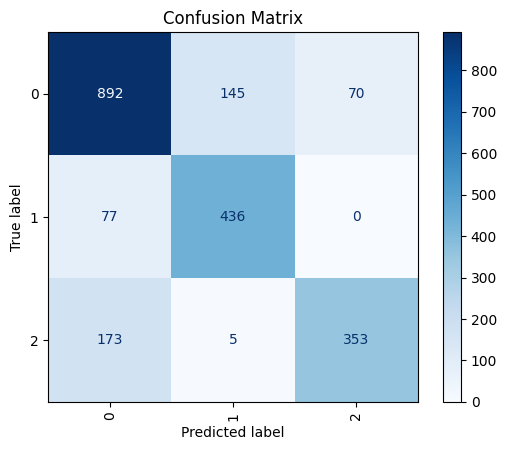

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.79


In [49]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.77


In [50]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.78


In [51]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1107
           1       0.74      0.85      0.79       513
           2       0.83      0.66      0.74       531

    accuracy                           0.78      2151
   macro avg       0.79      0.77      0.78      2151
weighted avg       0.79      0.78      0.78      2151

